In [1]:
import tensorflow as tf
#from tensorflow_examples.models.pix2pix import pix2pix
#import tensorflow_datasets as tfds
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, utils
from torch import nn
 
import numpy as np
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D,concatenate,Conv2DTranspose,Lambda,Multiply,Add,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io, transform
 
from tensorflow.keras.backend import int_shape,mean
 
#tfds.disable_progress_bar()
 
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
data_folder = os.getcwd().replace("/img-segmentation/unet_rhina3", "") + '/dataset/sagittal/all-augmented'
print(data_folder)

/Users/rhina/Documents/GitHub/AKCSE-Medical-Image-Analysis/dataset/sagittal/all-augmented


In [3]:
class Brain_data(Dataset):
    def __init__(self,path):
        self.path = path
        self.masks,self.images = [],[]

        for file in os.listdir(path):
            if '_mask_a' in file.split('.')[0]:
                self.masks.append(os.path.join(self.path,file))
            elif '_a' in file.split('.')[0]:
                self.images.append(os.path.join(self.path,file)) 
            elif '_mask' in file.split('.')[0]:
                self.masks.append(os.path.join(self.path,file)) 
            elif 'img' in file.split('.')[0]:
                self.images.append(os.path.join(self.path,file)) 
            else:
                print("File is invalid.")

        self.images = sorted(self.images, key=lambda string: string.split('/')[-1].strip("img").split('.')[0].strip('_a'))
        self.images = sorted(self.images, key=lambda string: int(string.split('/')[-1].split('_')[0].strip('img').strip('.png')))

        self.masks = sorted(self.masks, key=lambda string: string.split('/')[-1].strip("img").split('.')[0].strip('_mask_a'))
        self.masks = sorted(self.masks, key=lambda string: int(string.split('/')[-1].split('_')[0].strip('img').strip('.png')))
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image = self.images[idx]
        mask = self.masks[idx]

        image = io.imread(image)
        image = transform.resize(image,(256,256))
        image = image / 255
        image = image.transpose((2, 0, 1))
        
        
        mask = io.imread(mask)
        mask = transform.resize(mask,(256,256))
        mask = mask / 255
        mask = mask.transpose((2, 0, 1))

        image = torch.from_numpy(image)
        mask = torch.from_numpy(mask)
        
        return (image,mask)

In [4]:
data = Brain_data(data_folder)
print('Length of dataset is {}'. format(data.__len__()))
print('sample data: ')
data.__getitem__(0)

for img,msk in data:
      print(img.shape)
      print(msk.shape)
      break

Length of dataset is 1062
sample data: 
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


In [7]:
# splitting to trainset and validation set
length = data.__len__()
train_length = int(length*0.8)+1
val_length = int(length*0.2)

trainset, valset = random_split(data, [train_length, val_length])
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10,shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

In [14]:
def display(display_list):
    plt.figure(figsize=(18, 15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        '''
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
        '''
        plt.title(title[i])
        img = display_list[i] / 2 + 0.5
        npimg = img.numpy()
        npimg = np.clip(npimg, 0., 1.)
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        plt.show()

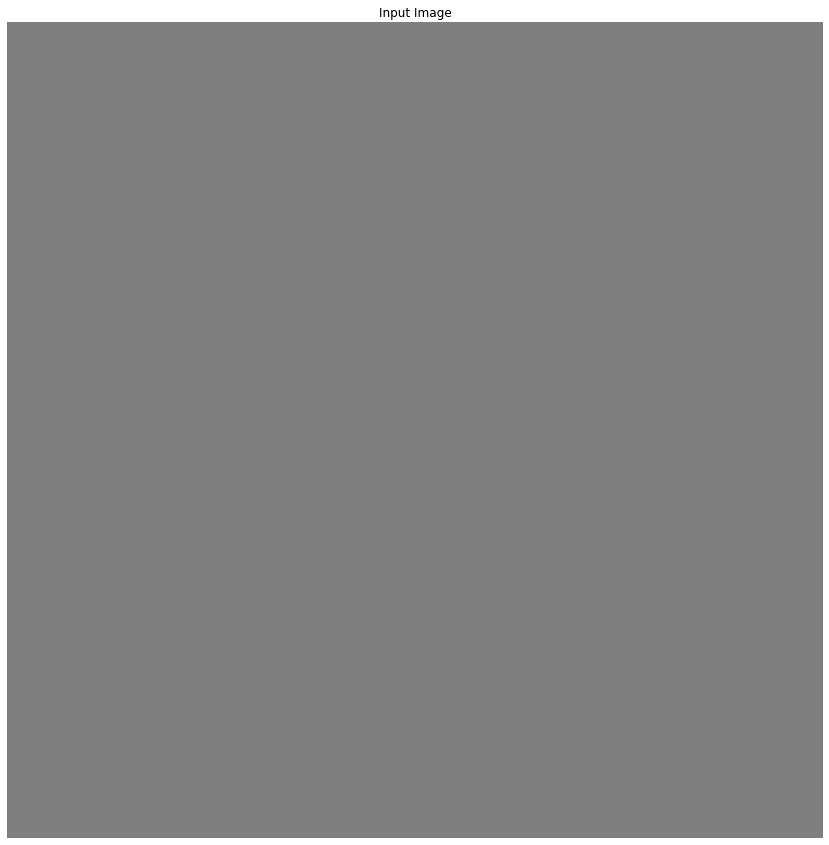

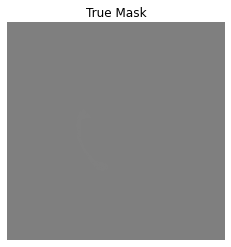

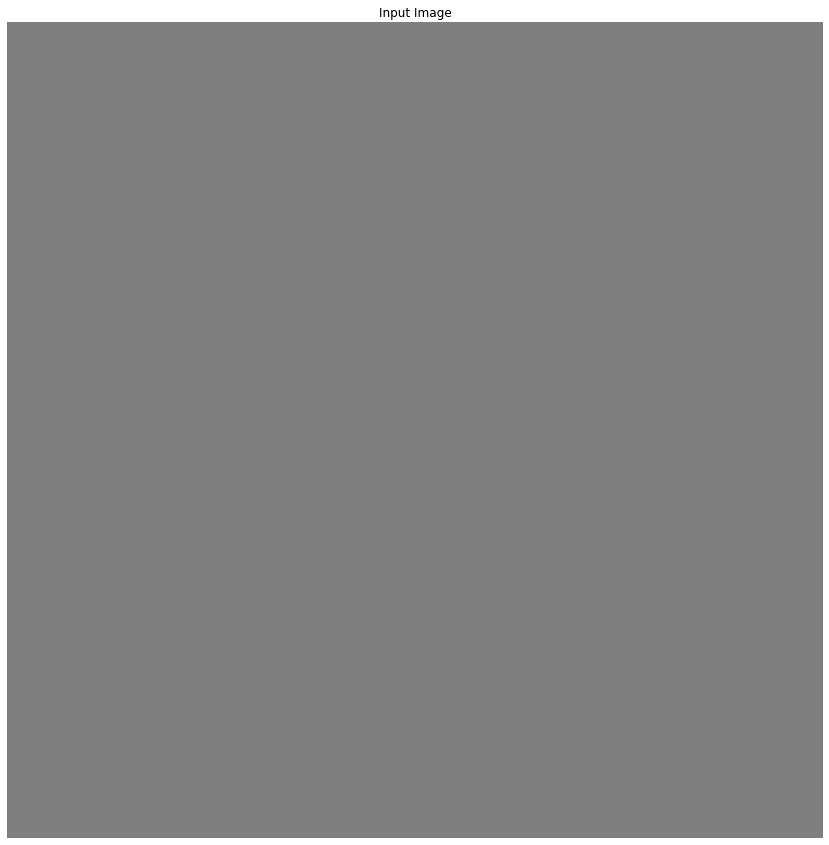

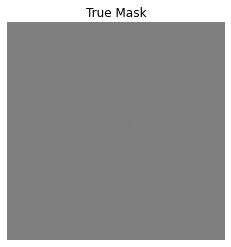

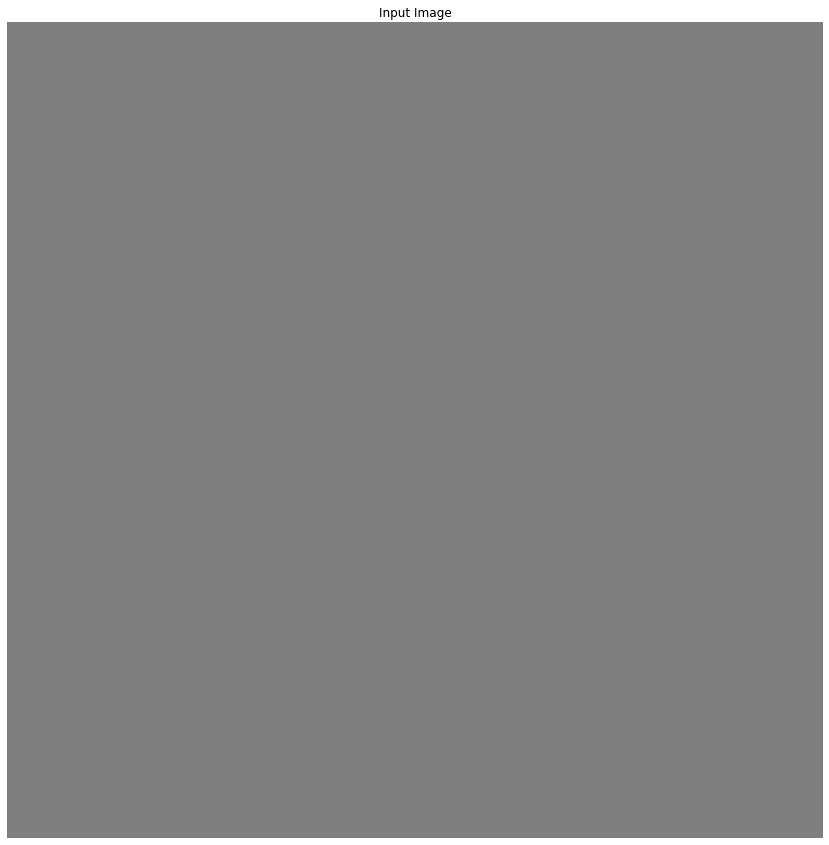

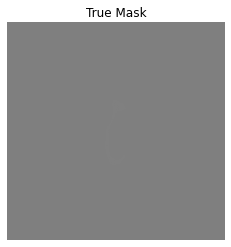

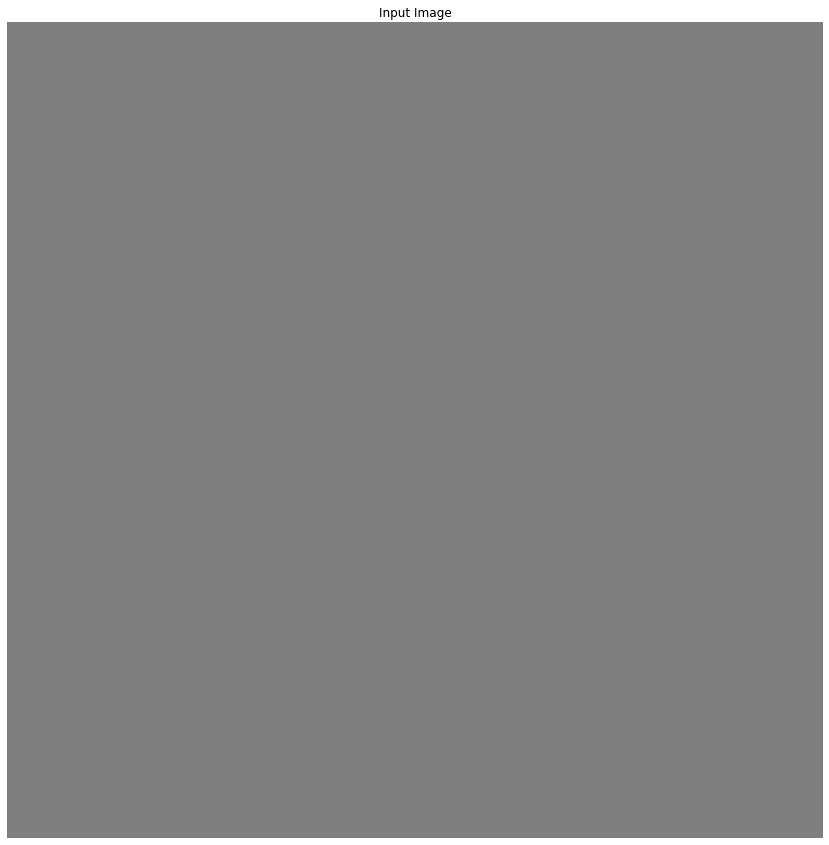

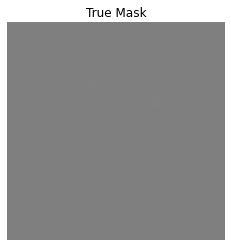

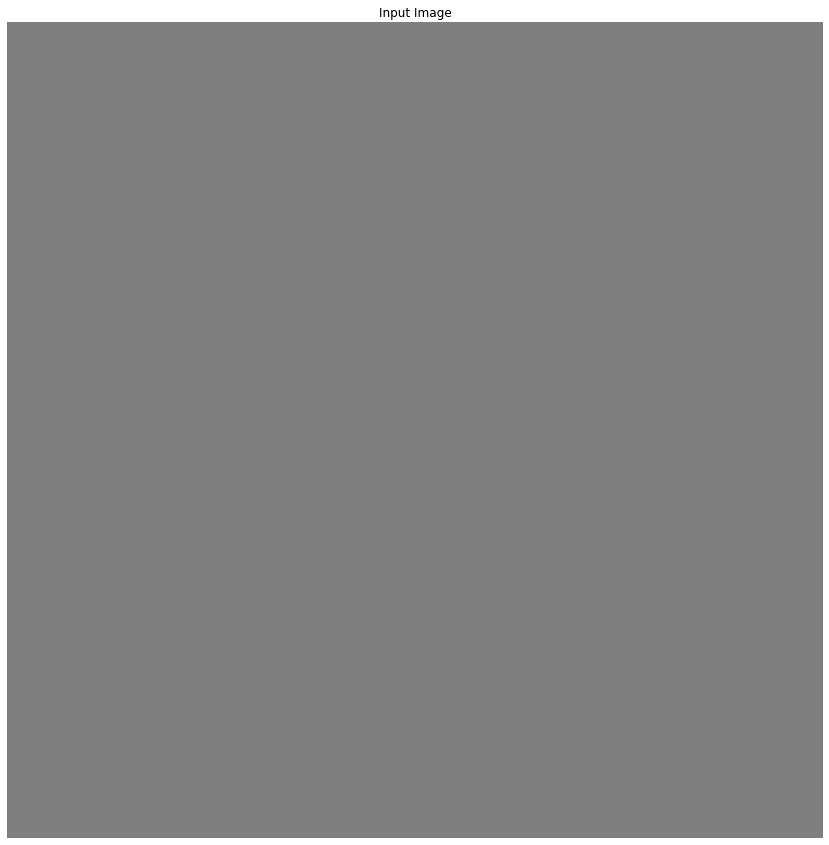

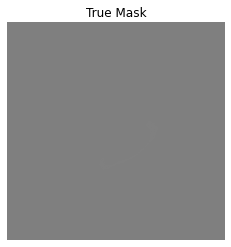

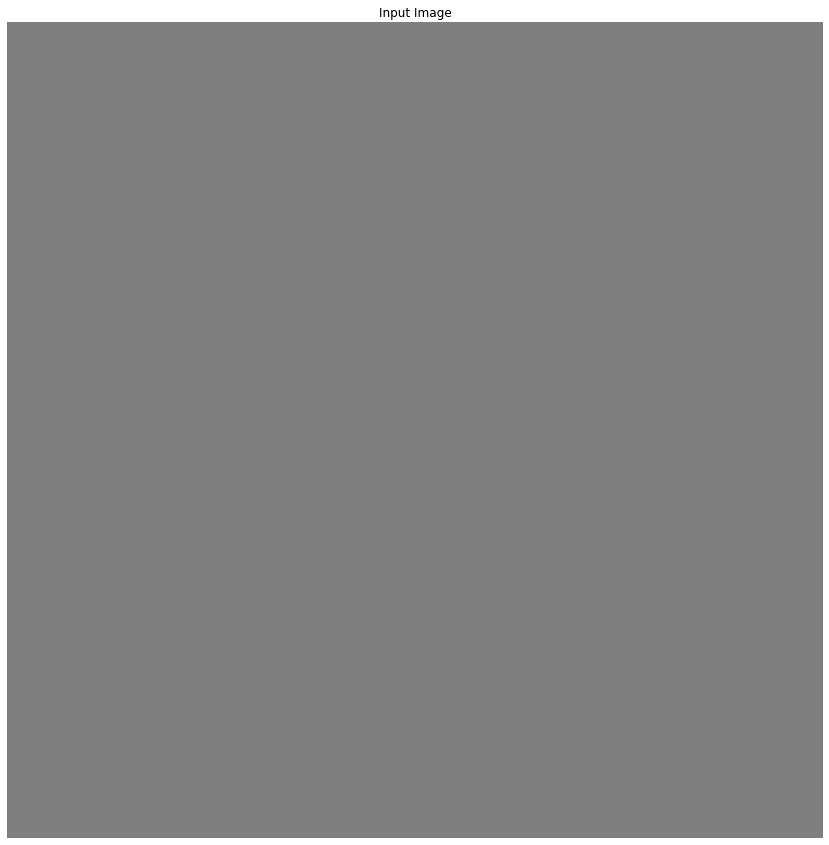

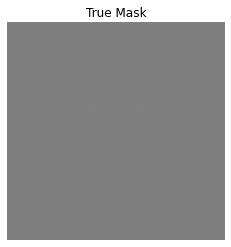

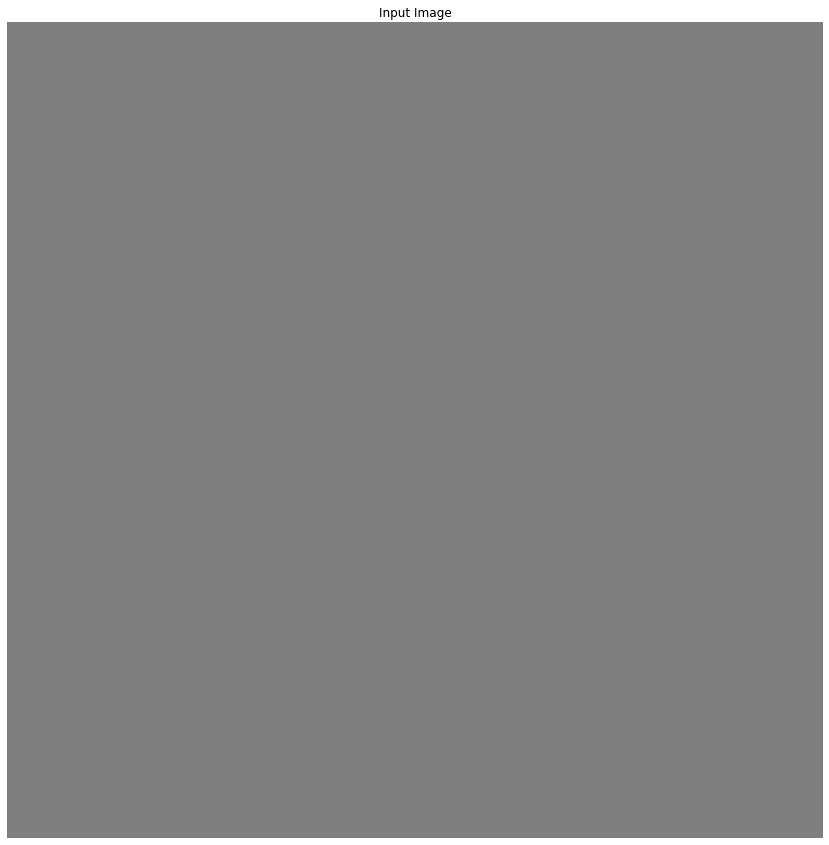

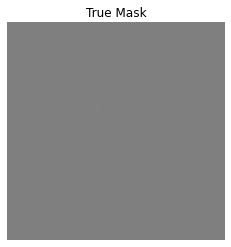

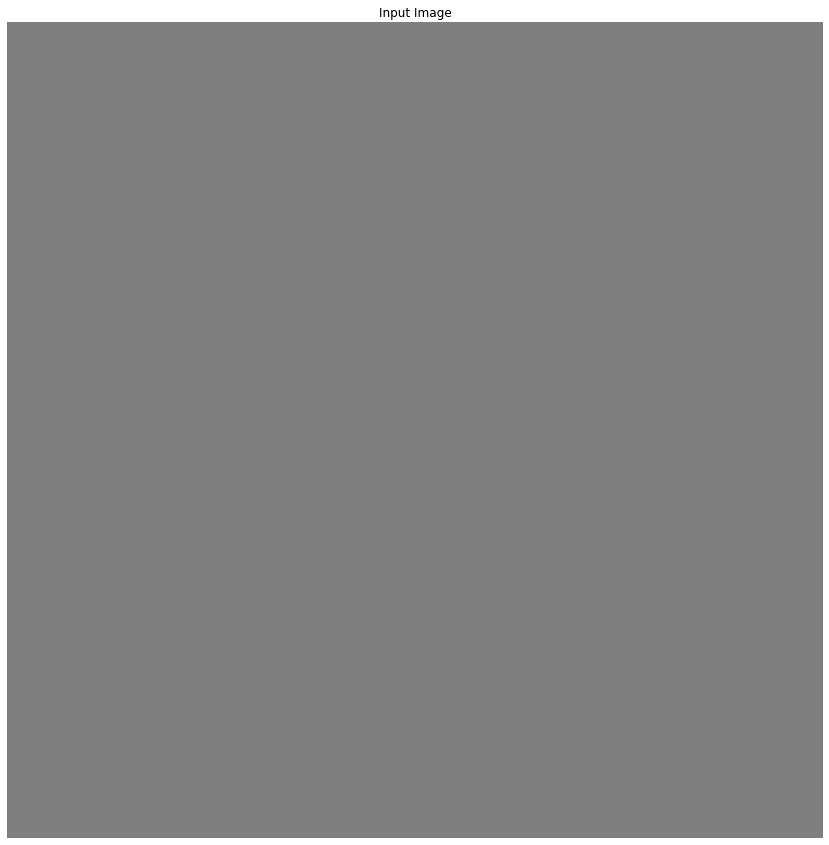

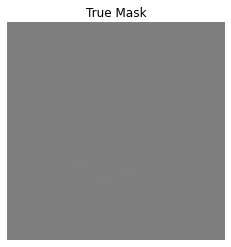

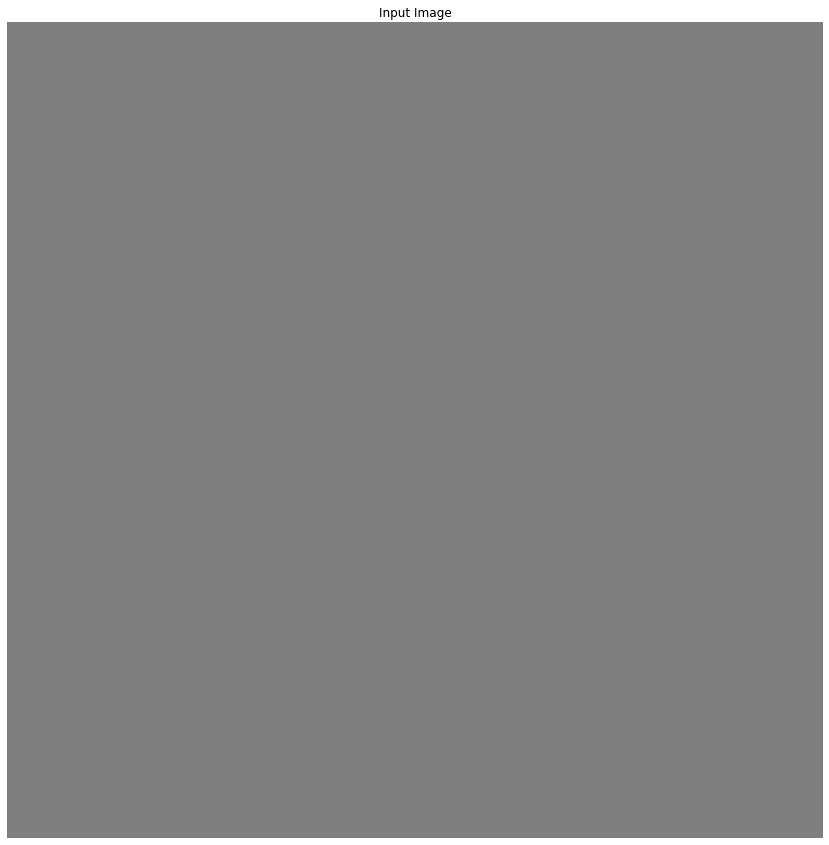

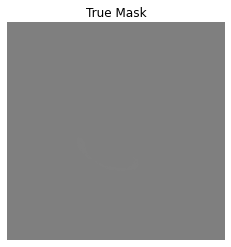

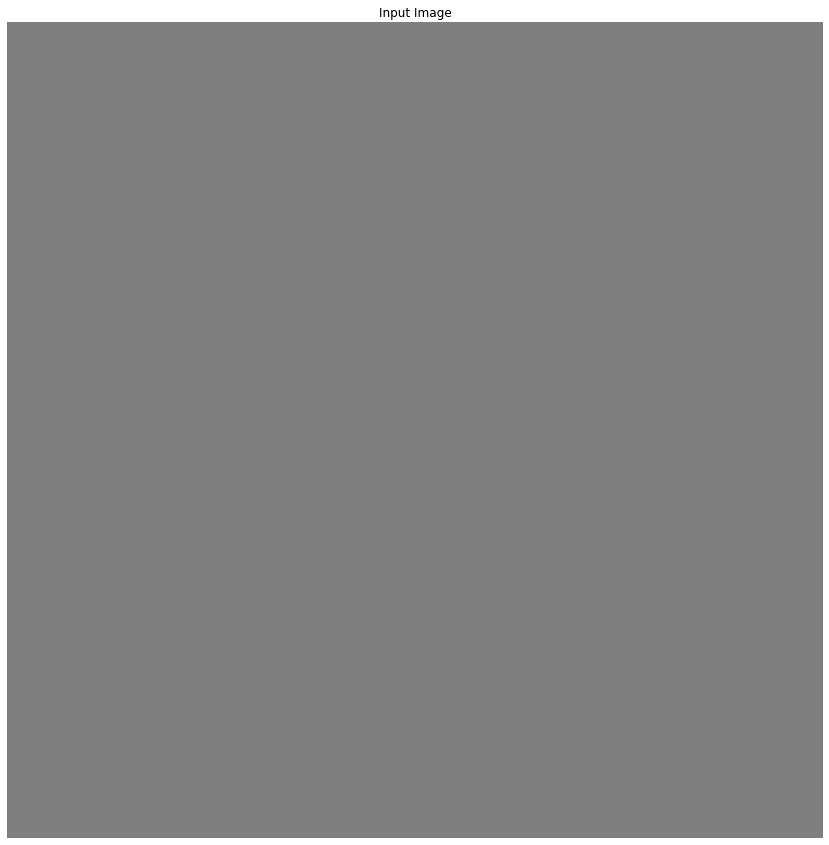

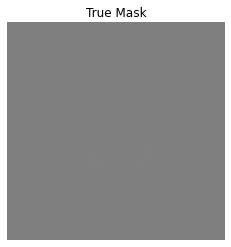

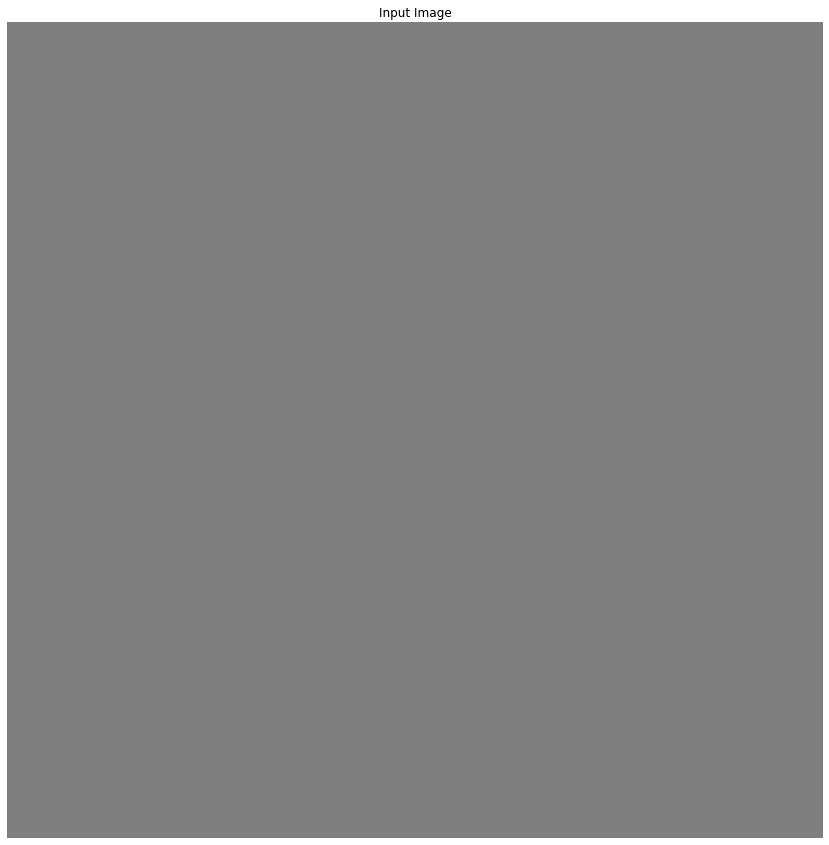

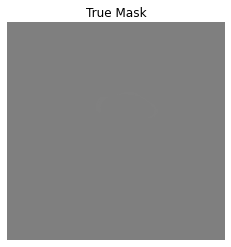

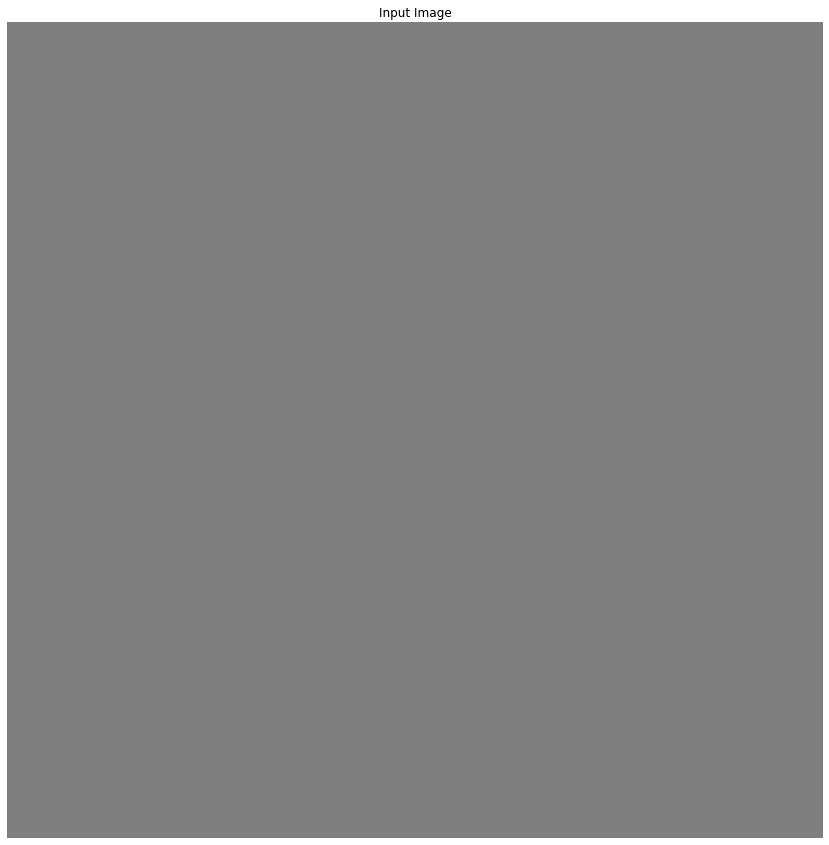

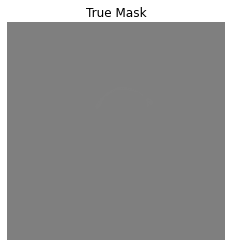

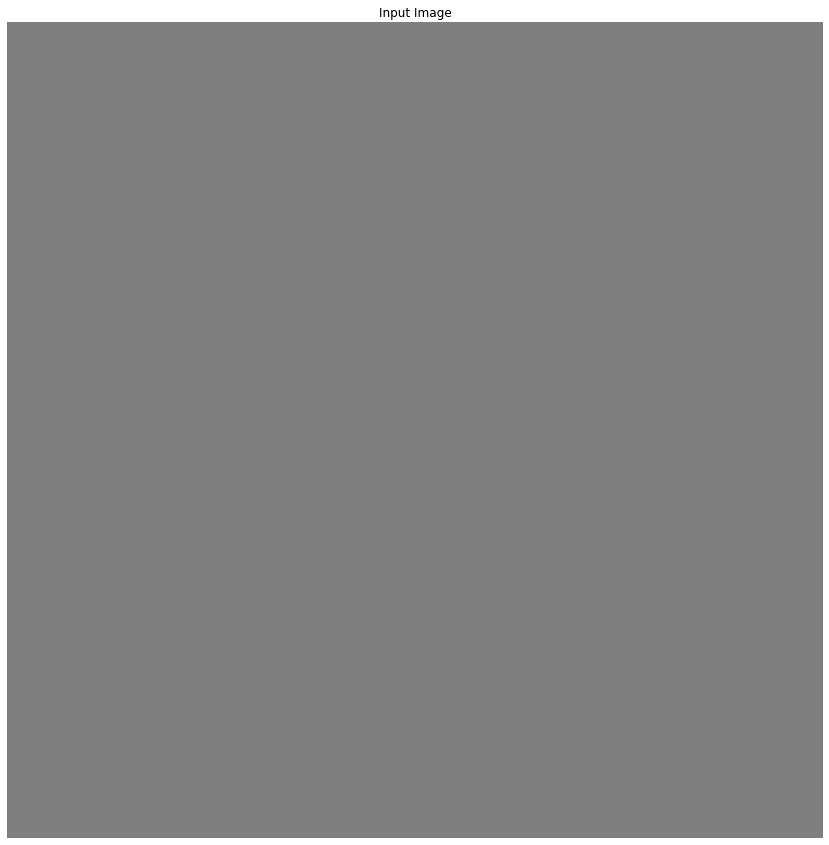

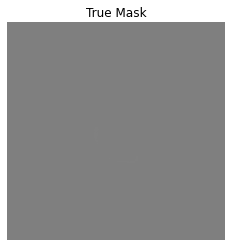

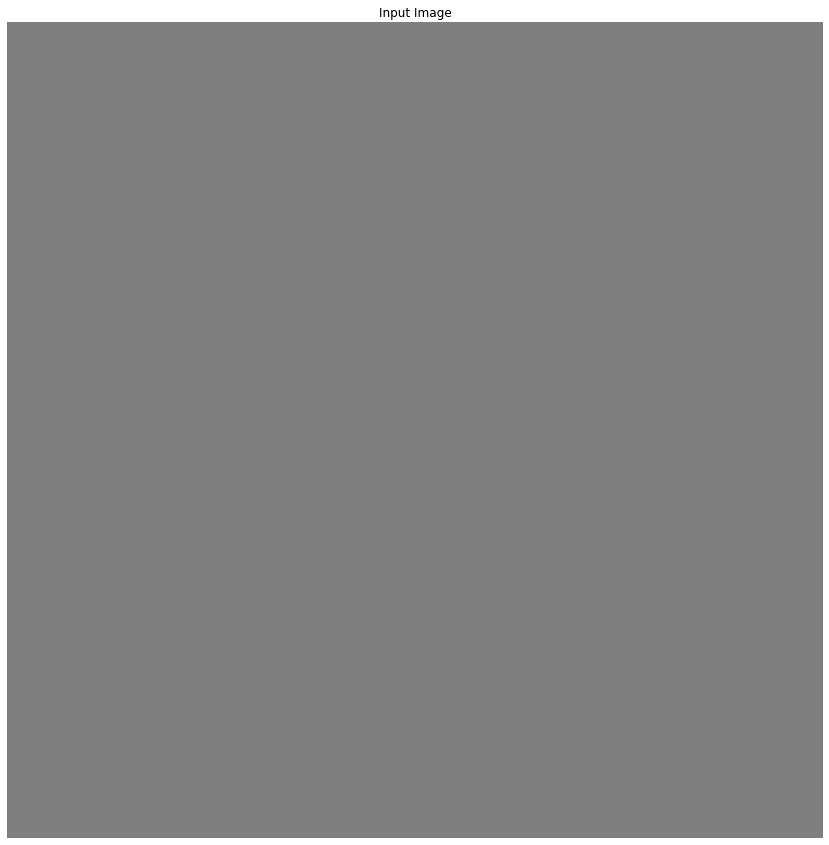

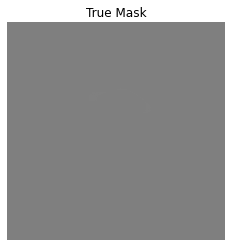

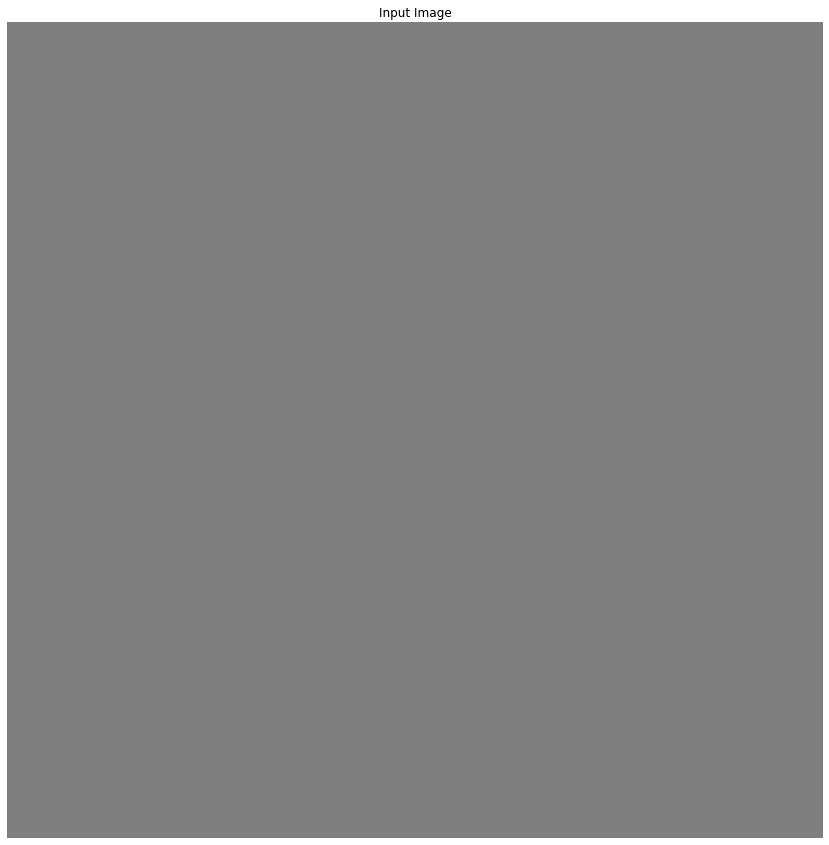

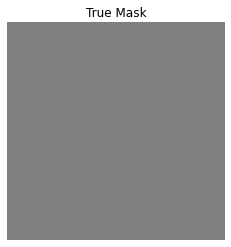

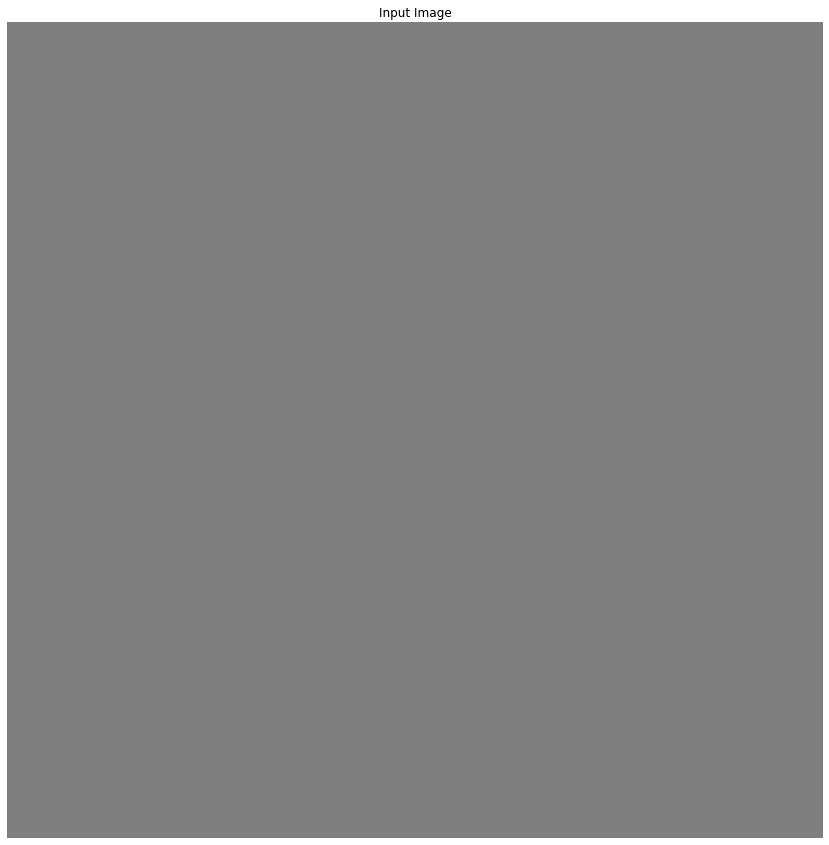

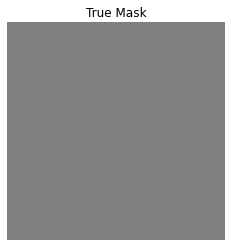

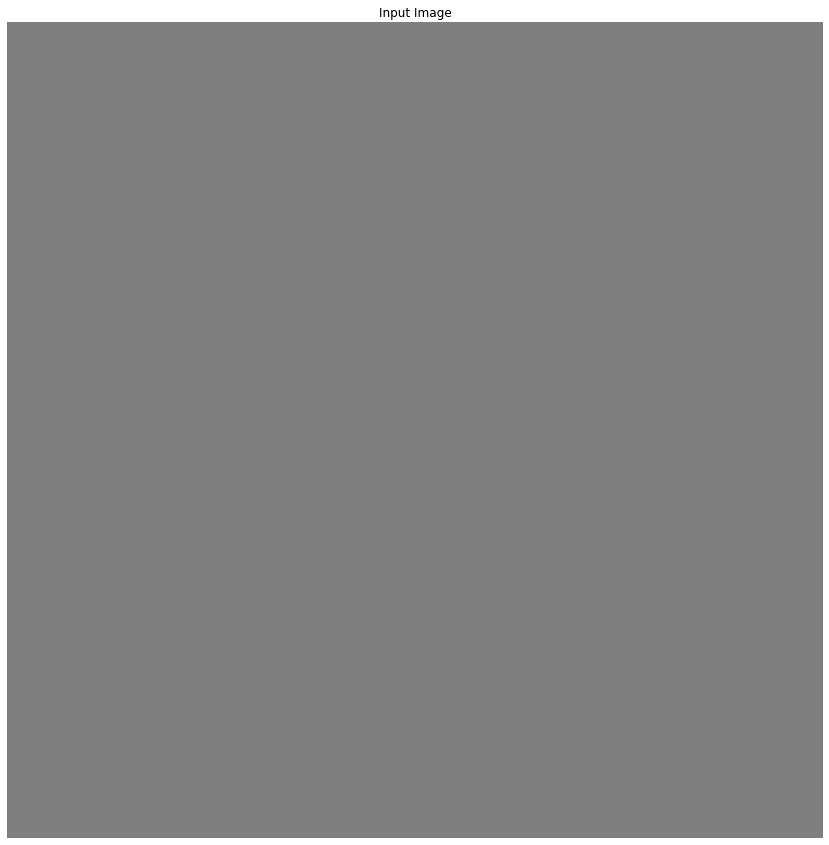

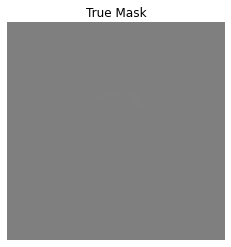

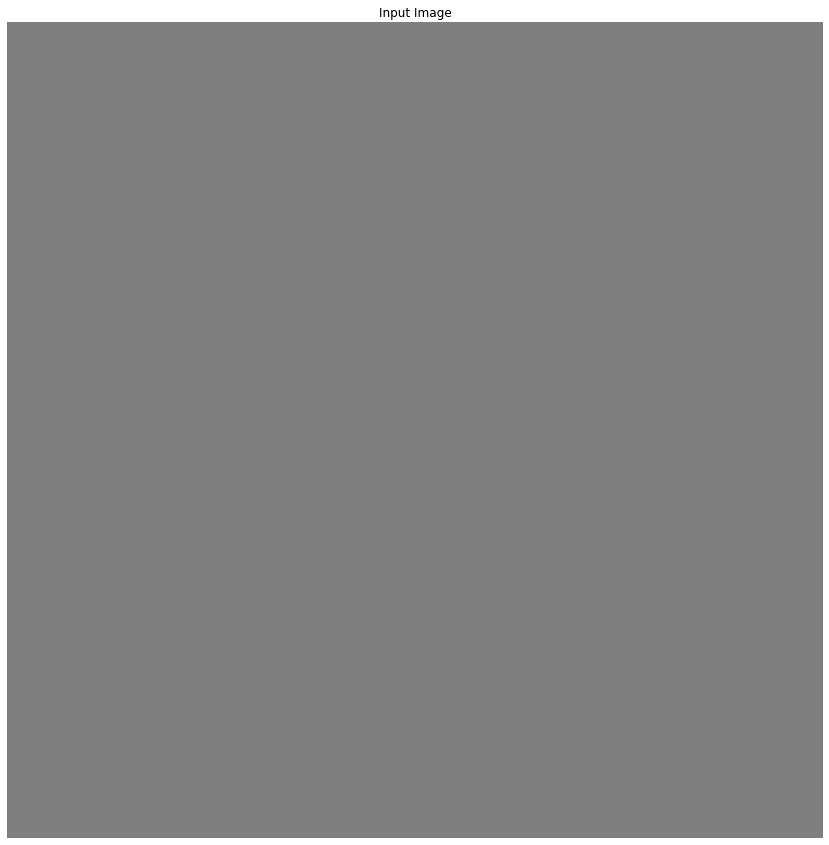

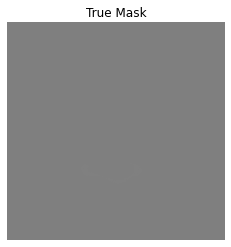

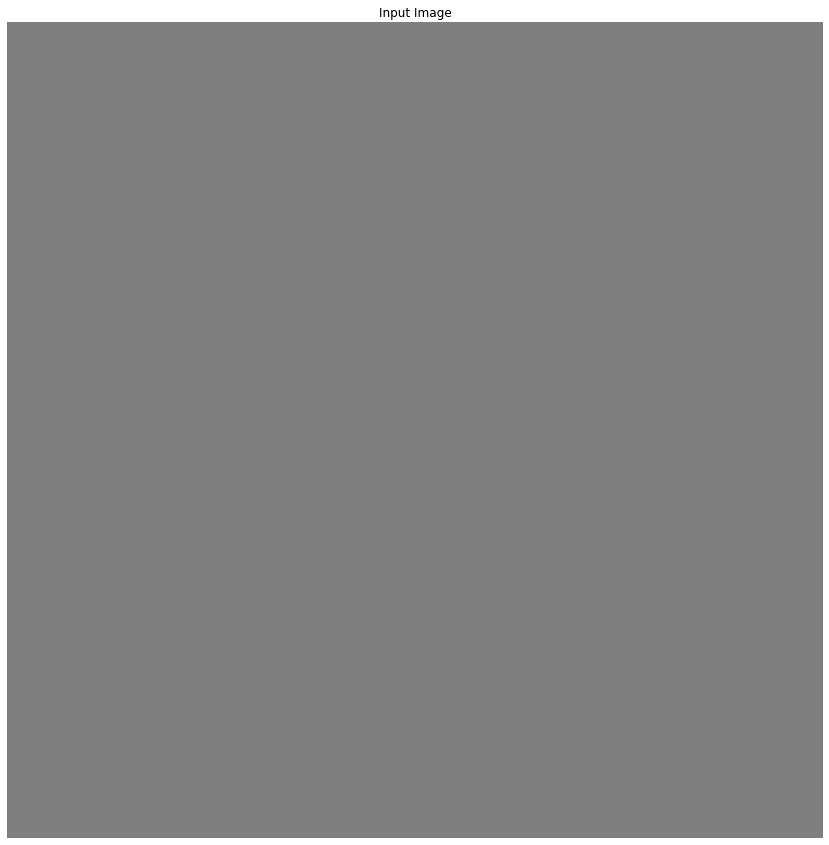

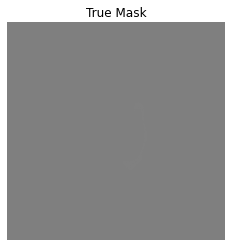

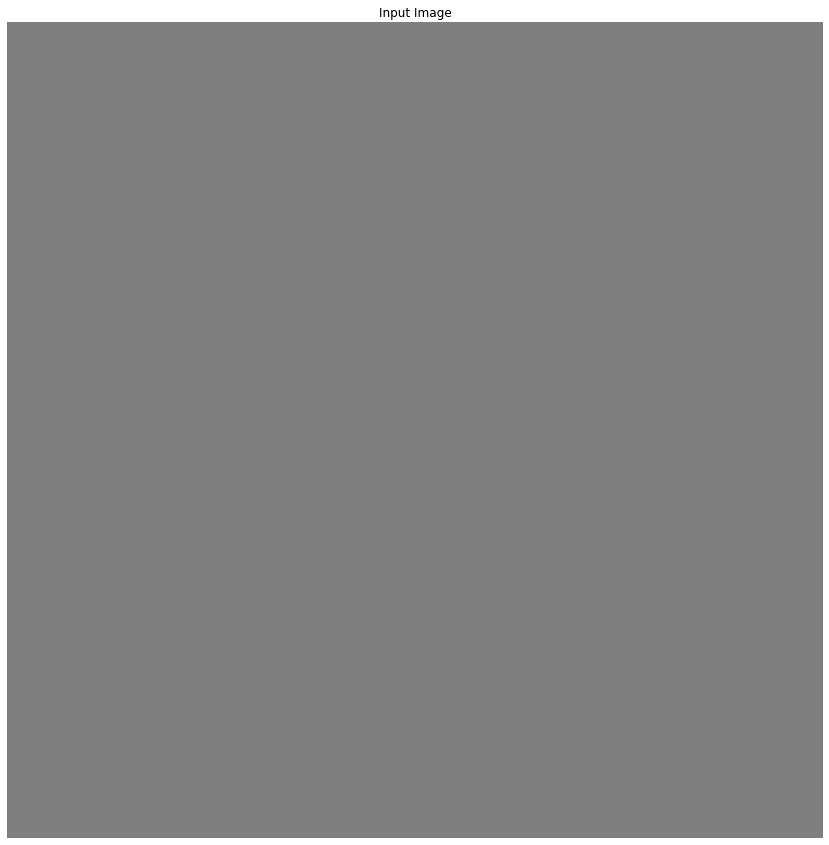

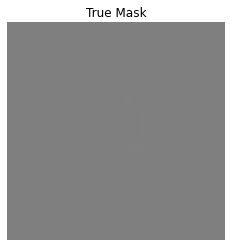

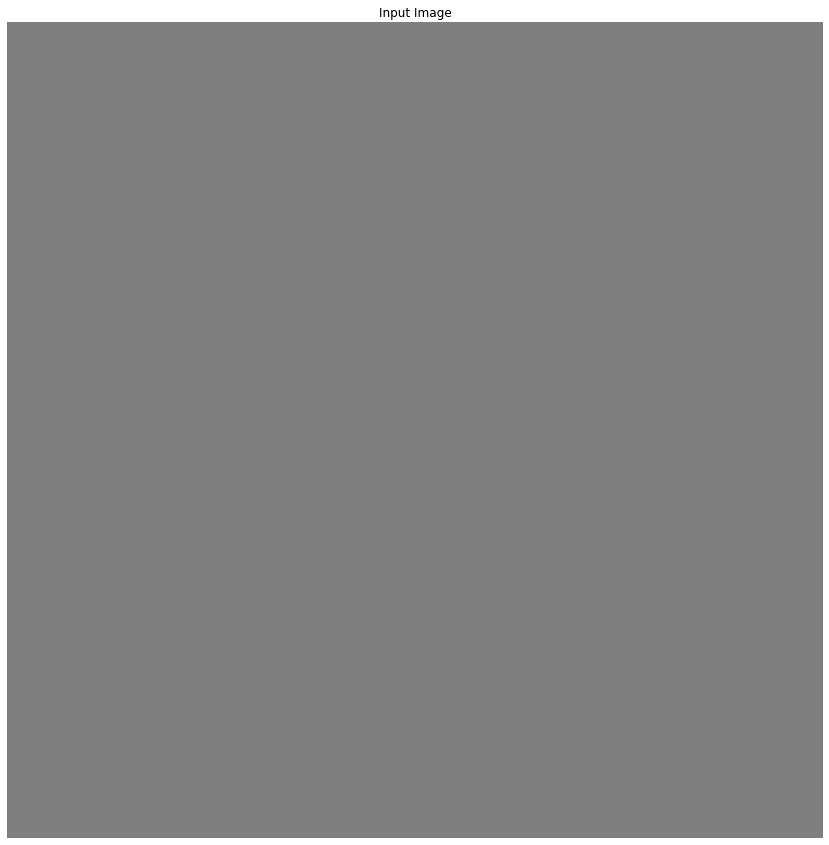

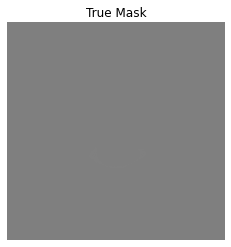

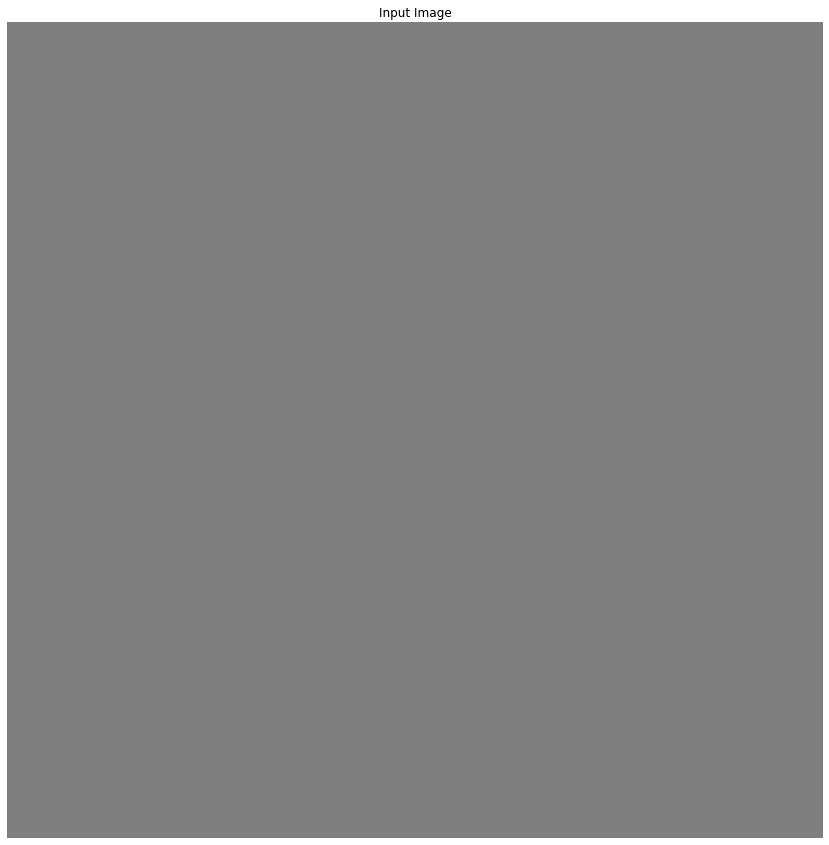

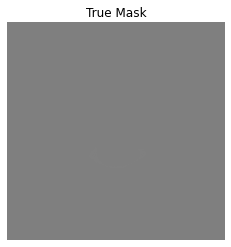

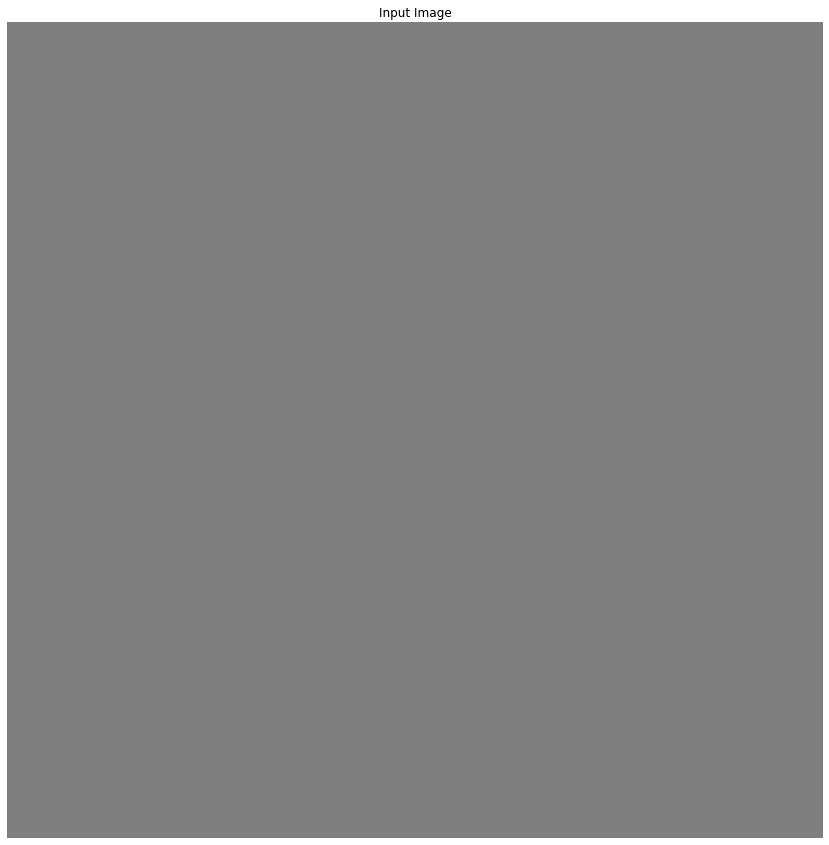

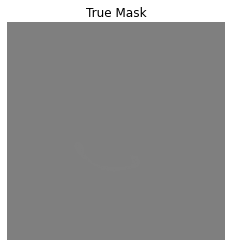

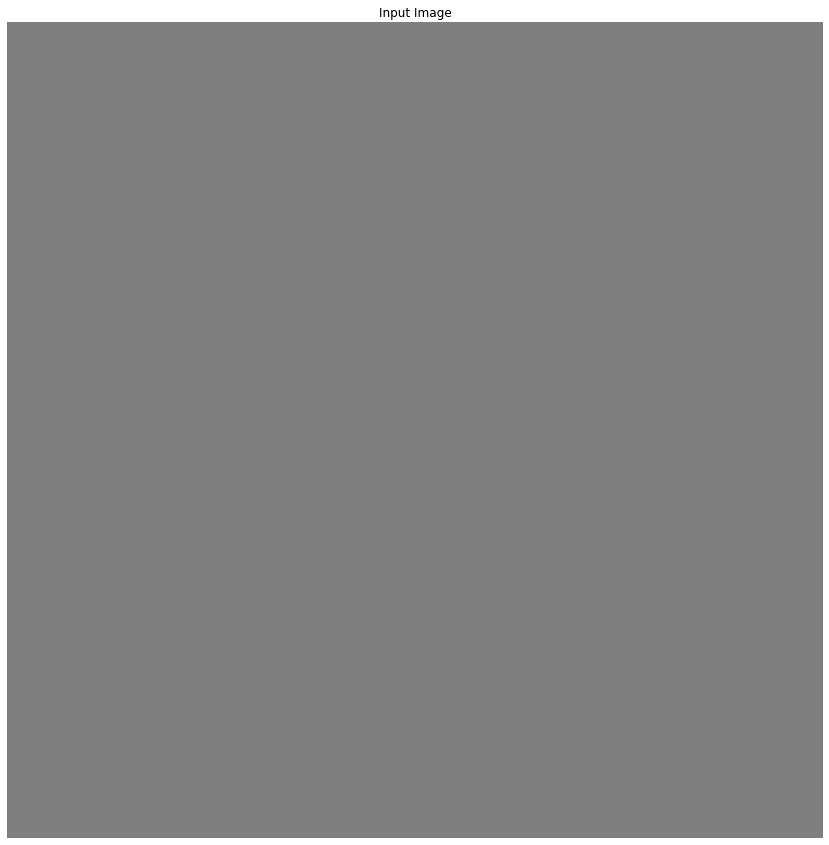

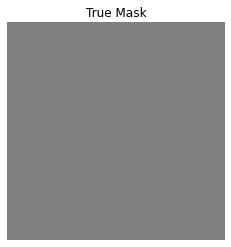

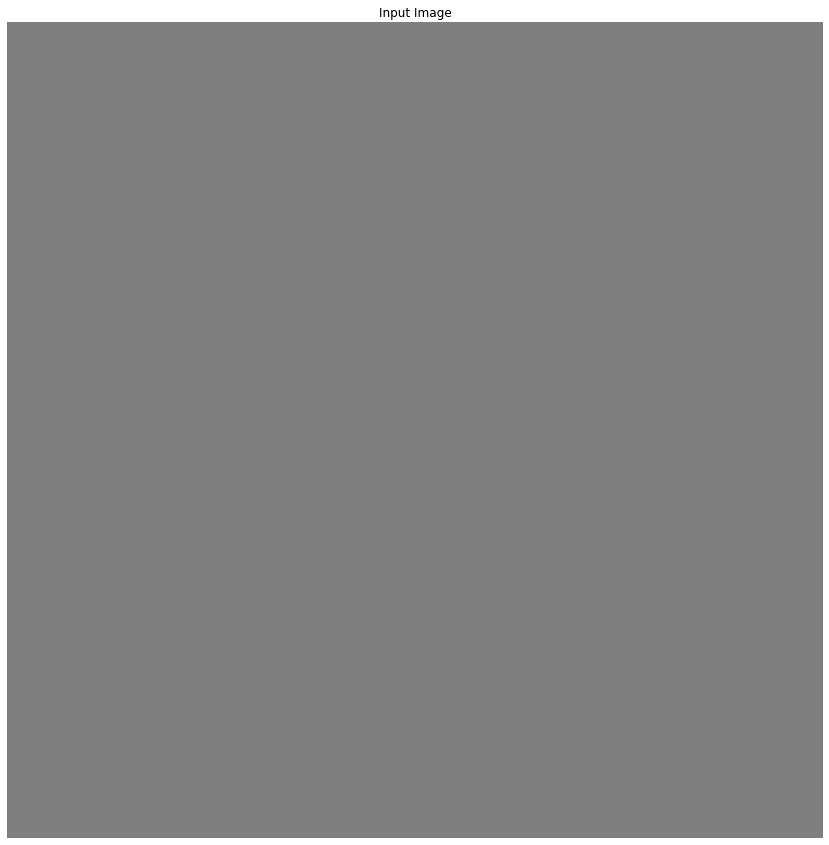

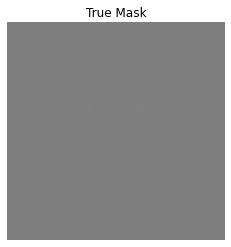

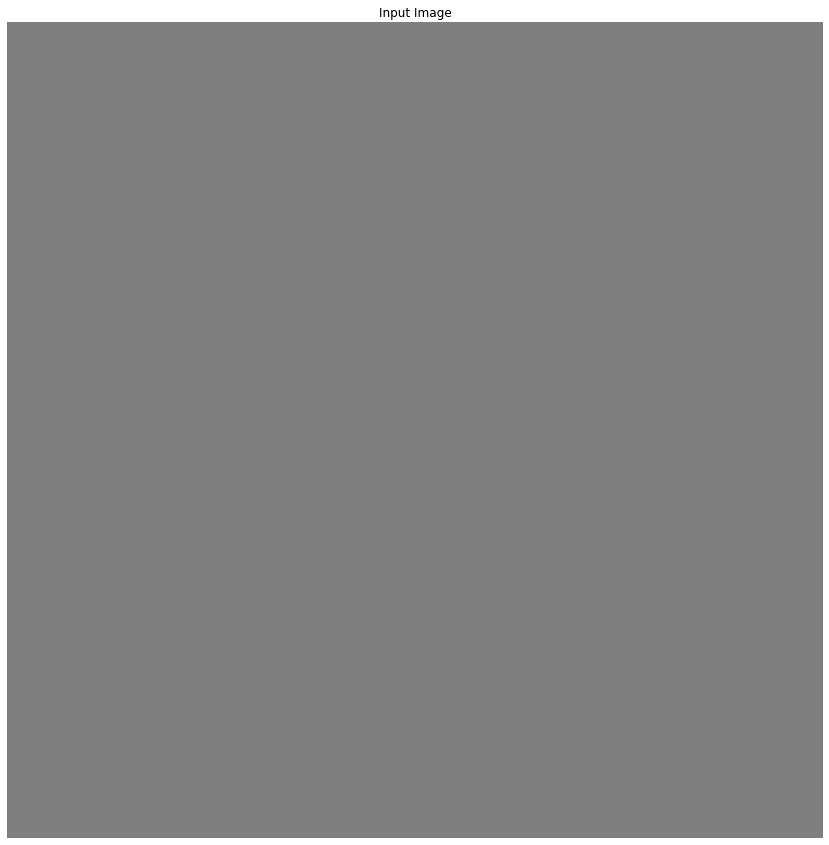

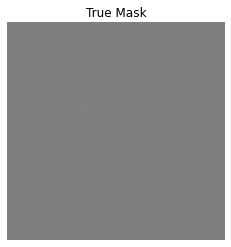

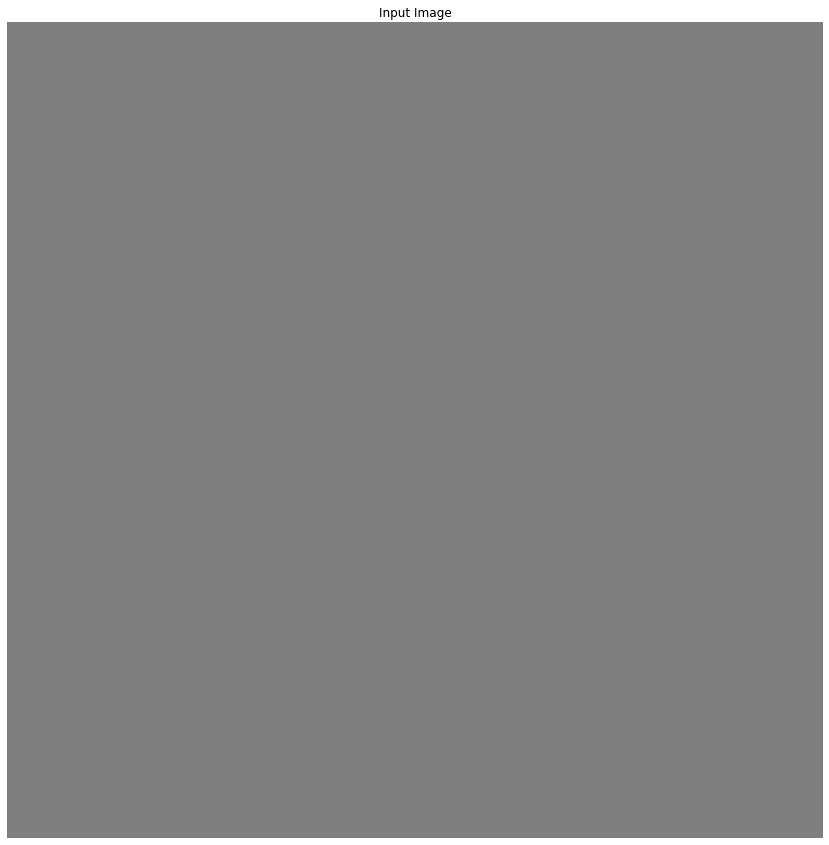

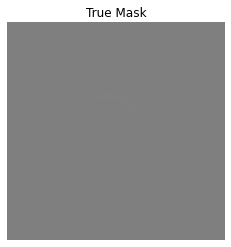

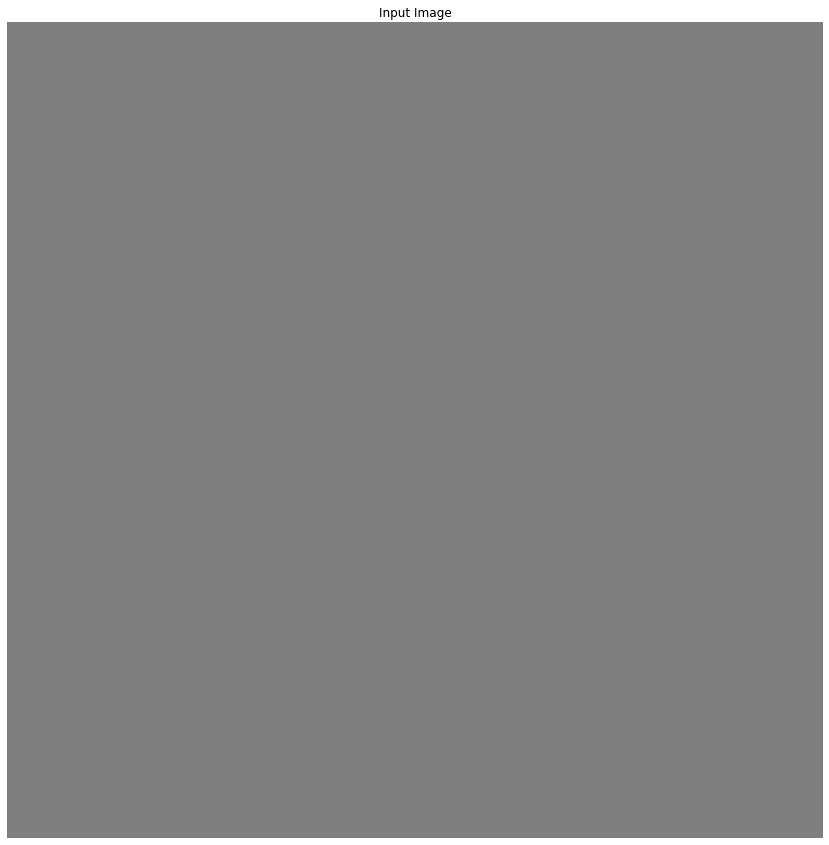

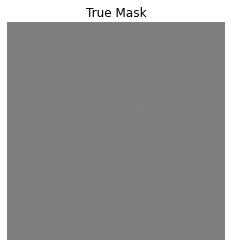

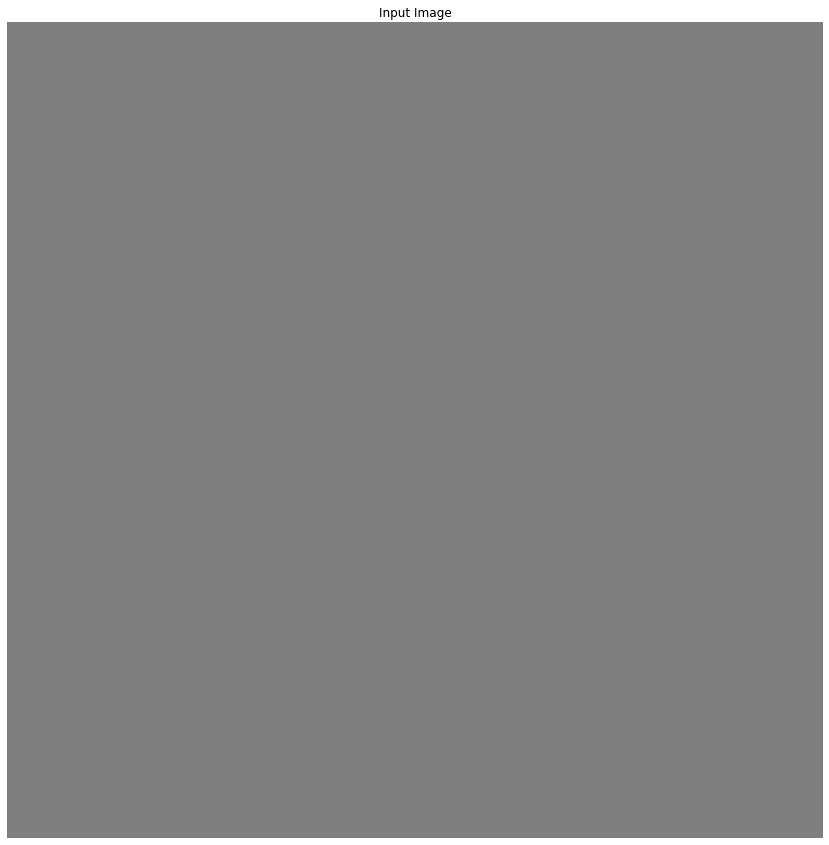

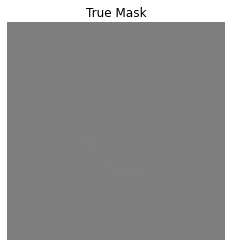

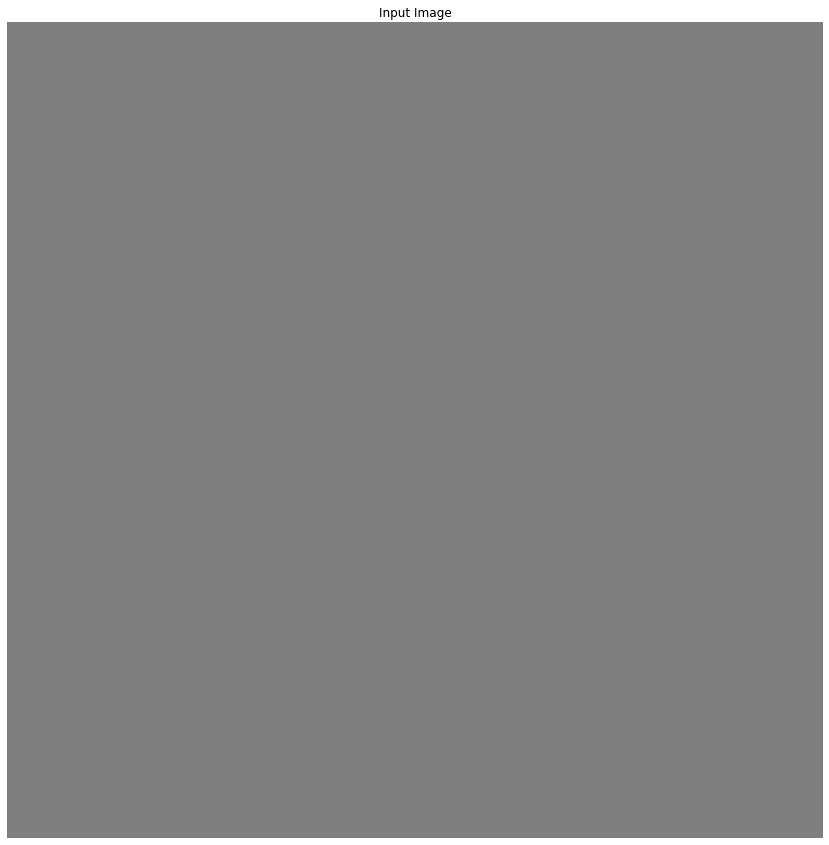

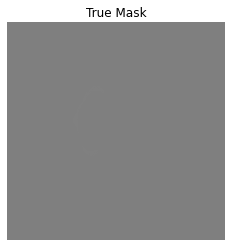

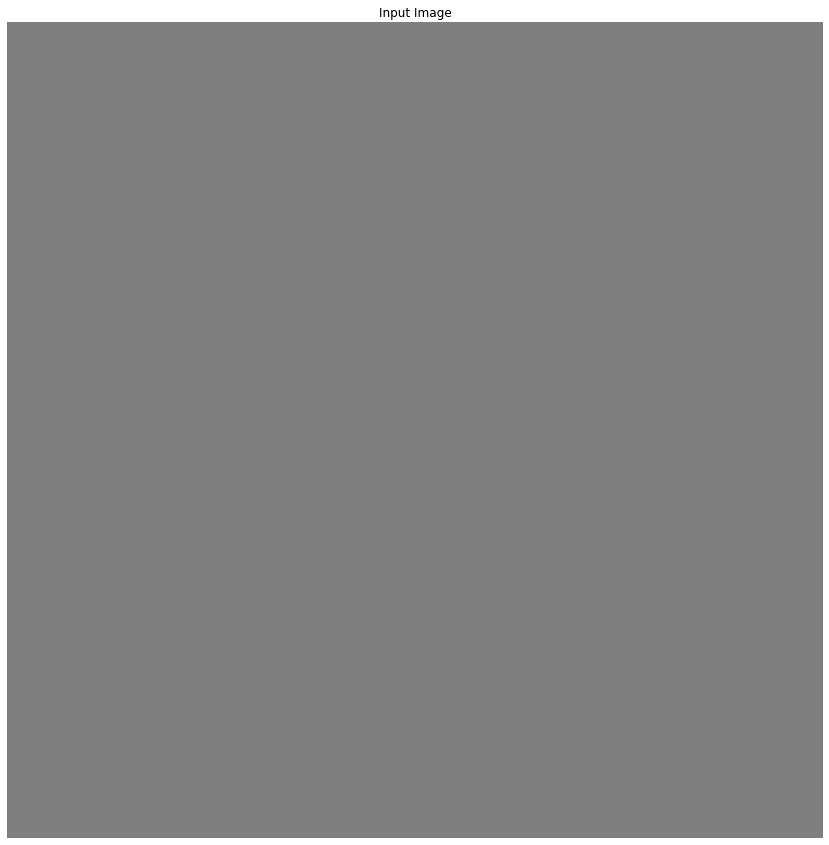

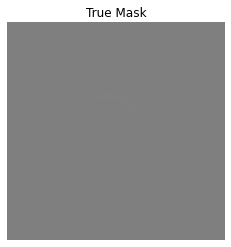

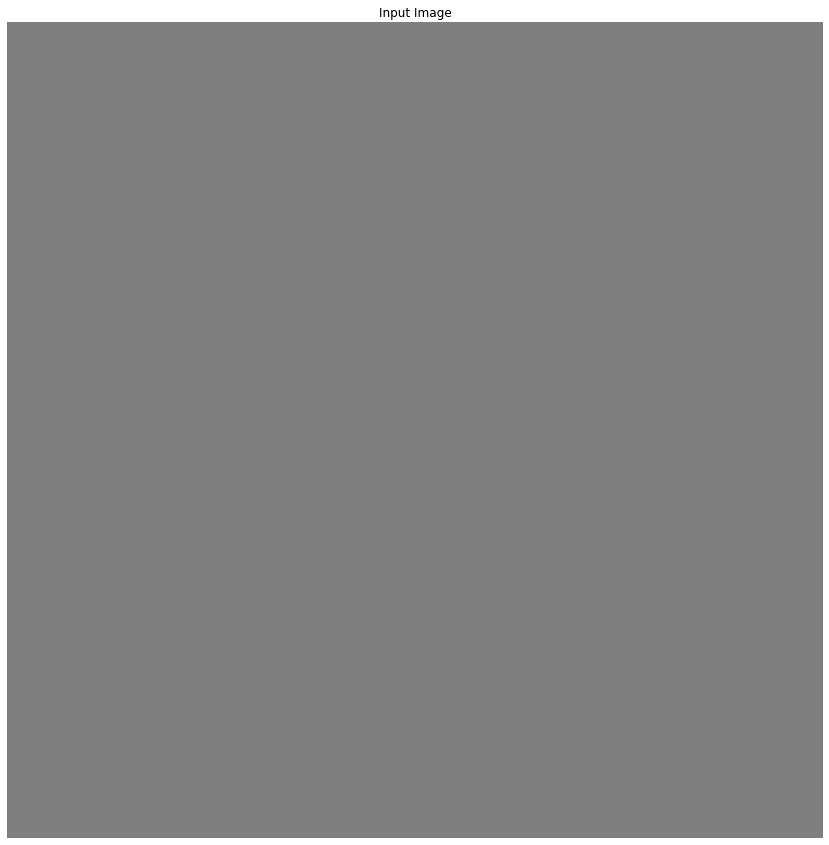

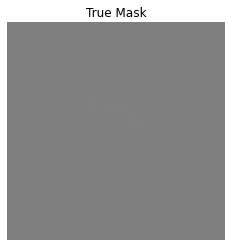

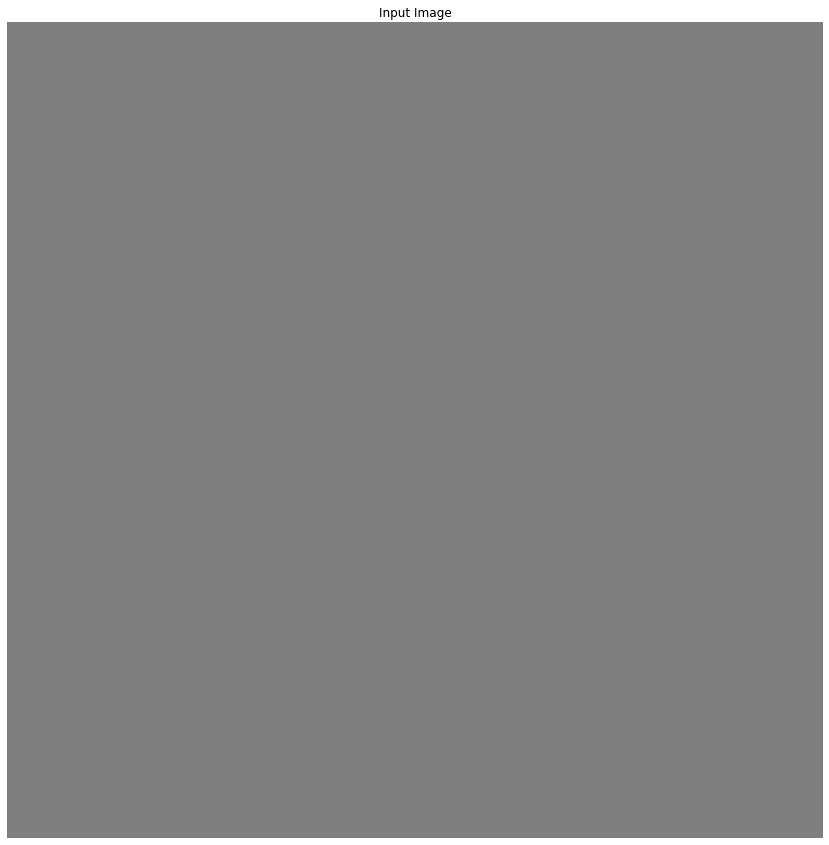

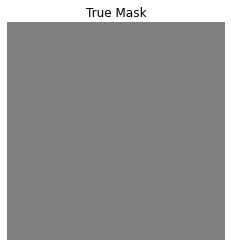

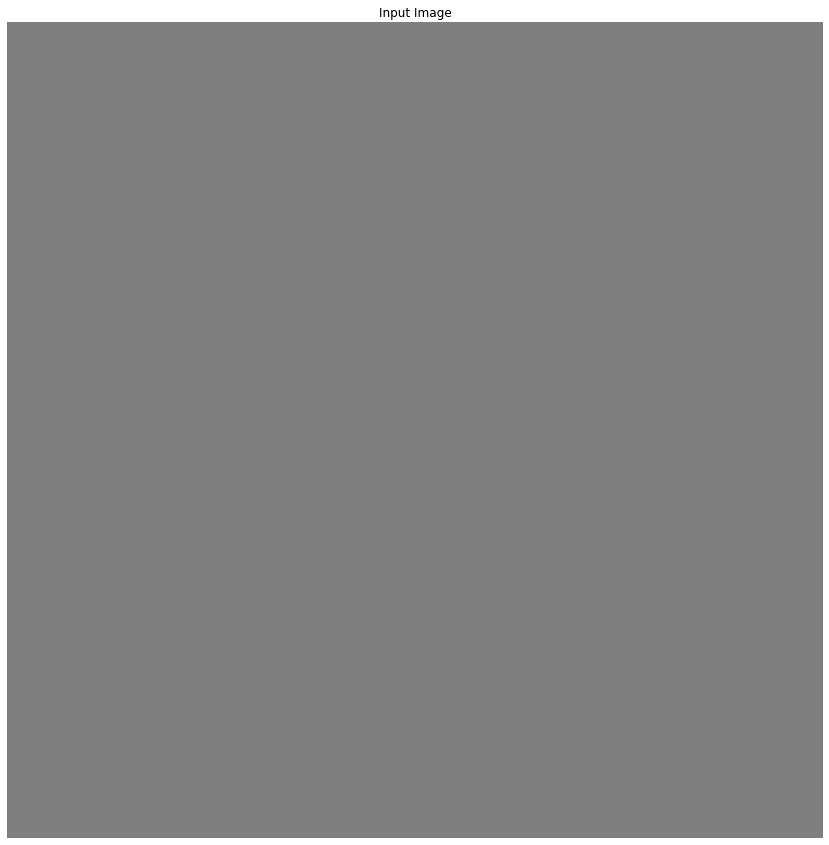

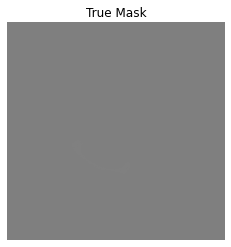

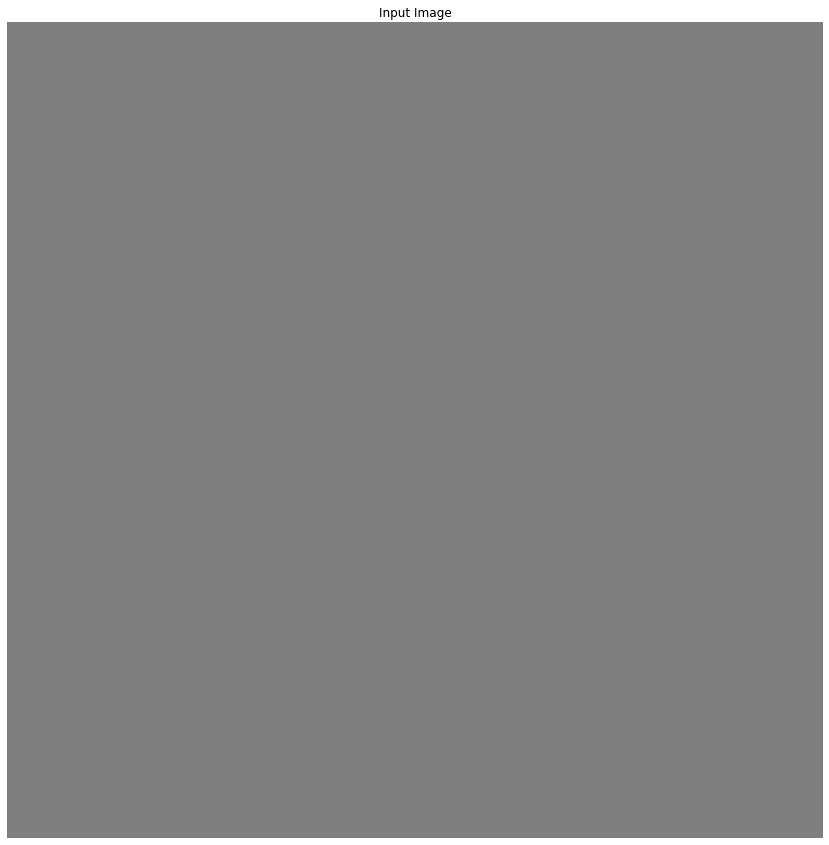

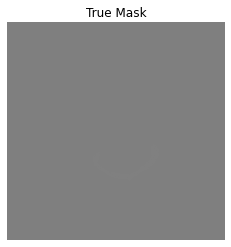

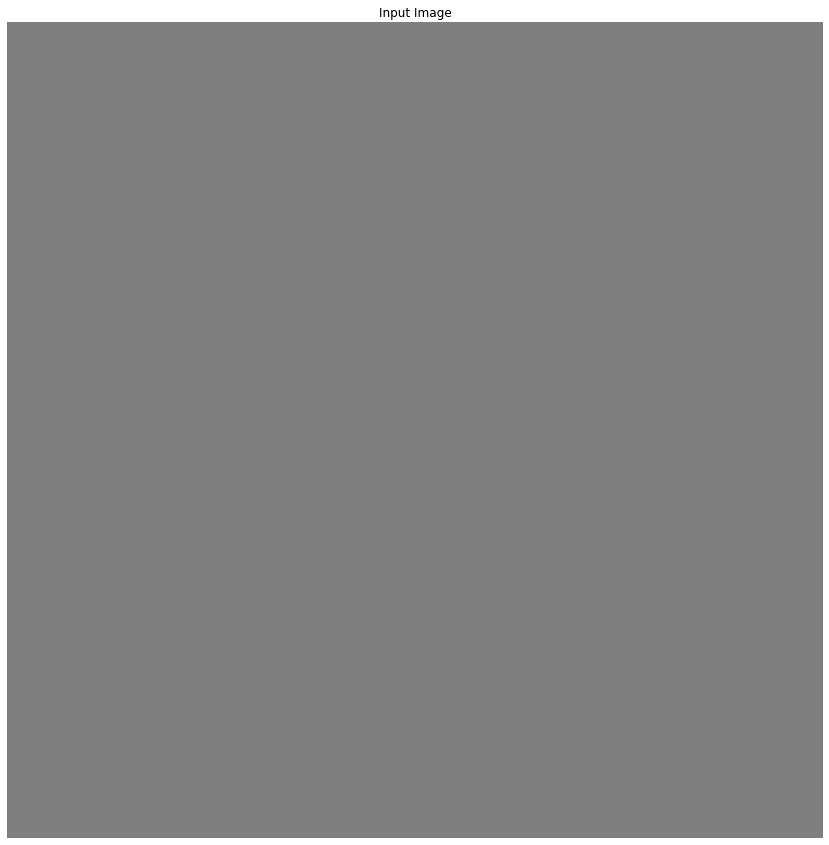

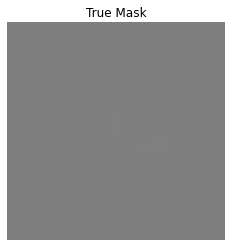

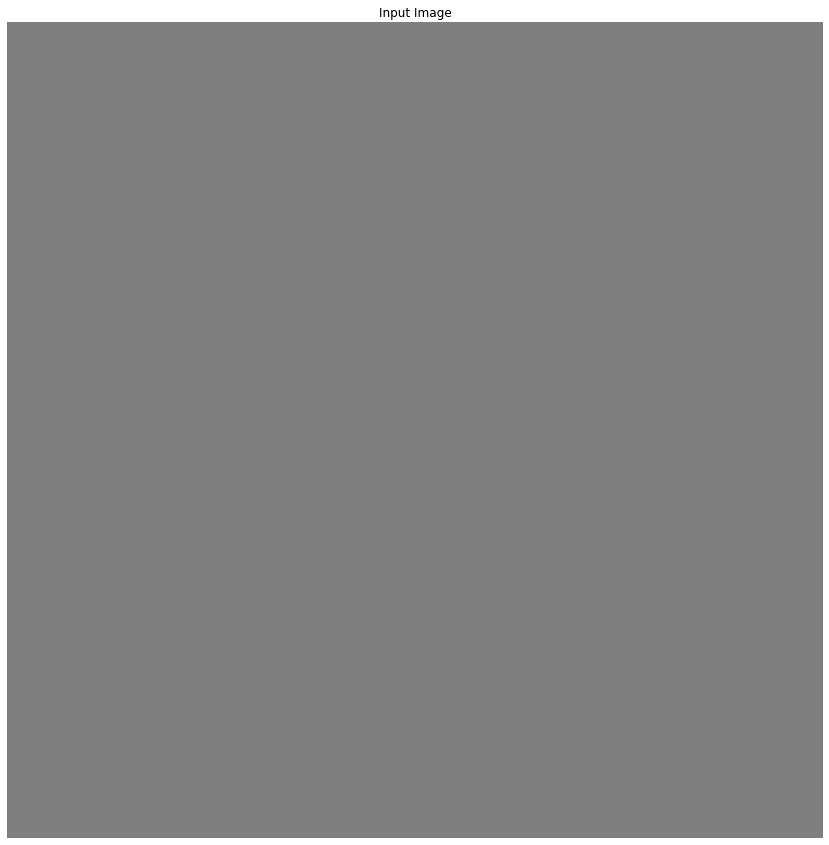

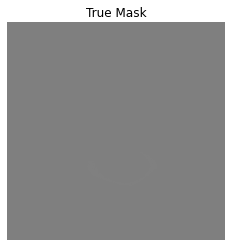

KeyboardInterrupt: 

In [15]:
for image, mask in trainset:
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])